In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('./rideshare_kaggle.csv')
# df = df.iloc[:1000]

#### Understanding Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


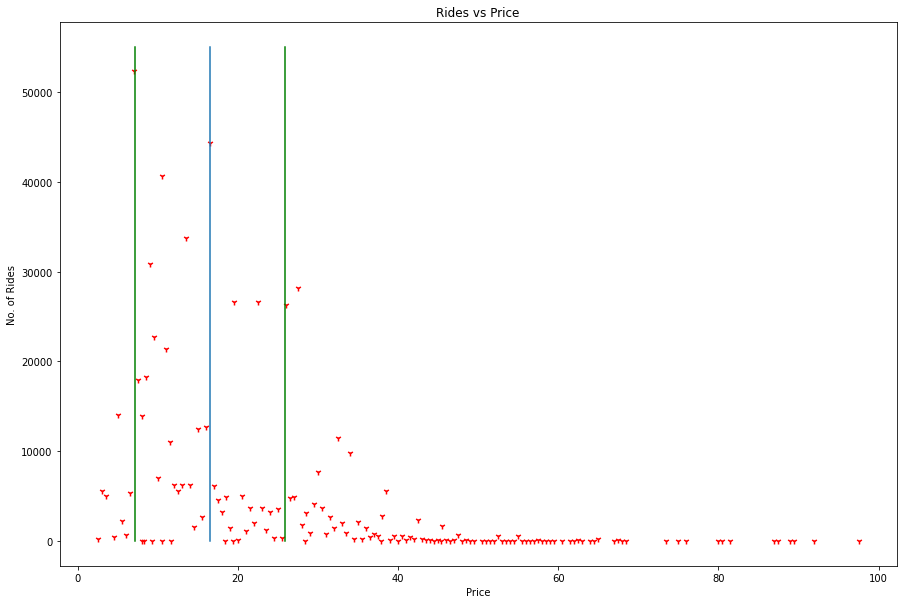

In [6]:
rides_vs_price = plt.figure(figsize=(15, 10))
sd = np.std(df['price'])
mean = df['price'].mean()
size = len(df['price'].unique())
freq = {}
for data in df['price'].unique() :
    freq[data] = len(df[df.price == data])
plt.plot([mean,mean],[0,55000])
plt.plot([mean-sd,mean-sd],[0,55000],color = "green")
plt.plot([mean+sd,mean+sd],[0,55000],color = "green")
plt.title("Rides vs Price")
plt.xlabel("Price")
plt.ylabel("No. of Rides")
plt.scatter(freq.keys(),freq.values(),marker = '1',color = 'red')

{'whiskers': [<matplotlib.lines.Line2D at 0x159133b97f0>,
 'caps': [<matplotlib.lines.Line2D at 0x159133b9d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x159133b9520>],
 'medians': [<matplotlib.lines.Line2D at 0x159133c6370>],
 'fliers': [<matplotlib.lines.Line2D at 0x159133c6640>],
 'means': []}

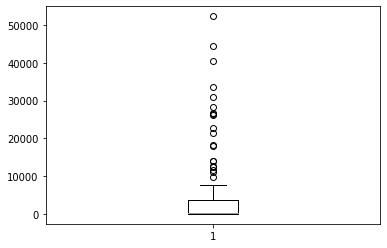

In [7]:
plt.boxplot(freq.values())


In [8]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Text(0, 0.5, 'Columns')

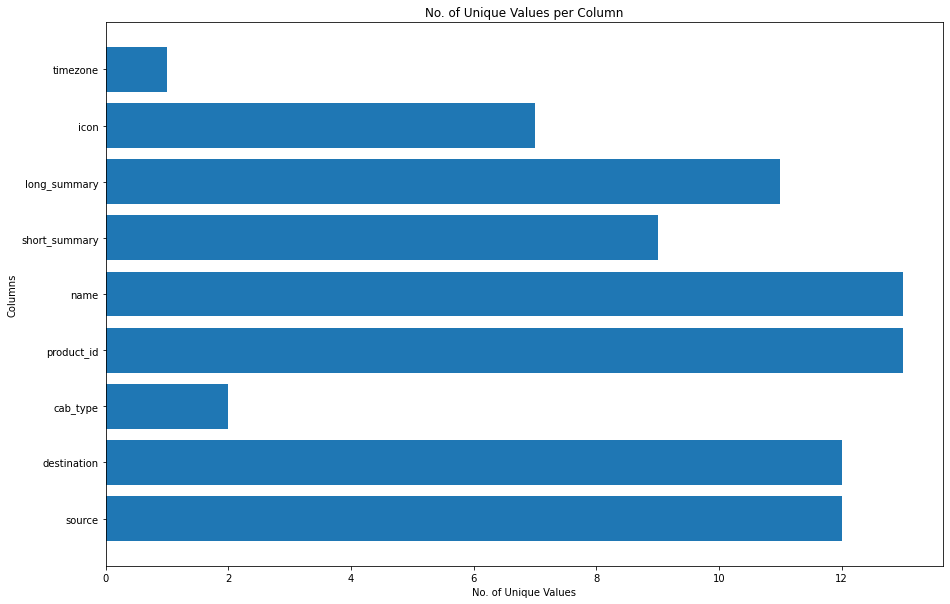

In [9]:
col_vs_values = plt.figure(figsize=(15, 10))
col_list = ['source','destination','cab_type','product_id','name','short_summary','long_summary','icon','timezone']
unique_val = []
for data in col_list :
    unique_val += [len(pd.unique(df[data]))]
plt.barh(col_list,unique_val)
plt.title("No. of Unique Values per Column")
plt.xlabel("No. of Unique Values")
plt.ylabel("Columns")

#### Data preprocessing

In [10]:
df = df.dropna()
N = df.shape[0]

In [11]:
df.loc[df.cab_type=='Uber','product_id'] = 'Uber'
df = df.drop("id",axis="columns")
df = df.drop("timezone",axis="columns")

## From here

In [12]:
# rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]

In [13]:
# New_df = df[['source','destination','cab_type','distance','product_id','price']]
# New_df = pd.get_dummies(New_df,columns=['source','destination','cab_type','product_id'],drop_first=True);

In [14]:
# df_with_na=pd.DataFrame()
# df_with_na=df_with_na.append(New_df.iloc[rows_with_nan])

# df_noNull=New_df.dropna()


In [15]:
# x_noNull = df_noNull.drop("price",axis="columns")
# y_noNull=df_noNull[['price']]


# ml_model = linear_model.LinearRegression()
# ml_model.fit(x_noNull, y_noNull)

# x_with_Null = df_with_na.drop("price",axis="columns")
# y_with_Null = ml_model.predict(x_with_Null)
# df.loc[rows_with_nan,'price'] = y_with_Null

## To here

In [16]:
df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparent

#### Data visualization

Text(0, 0.5, 'Average price (in $)')

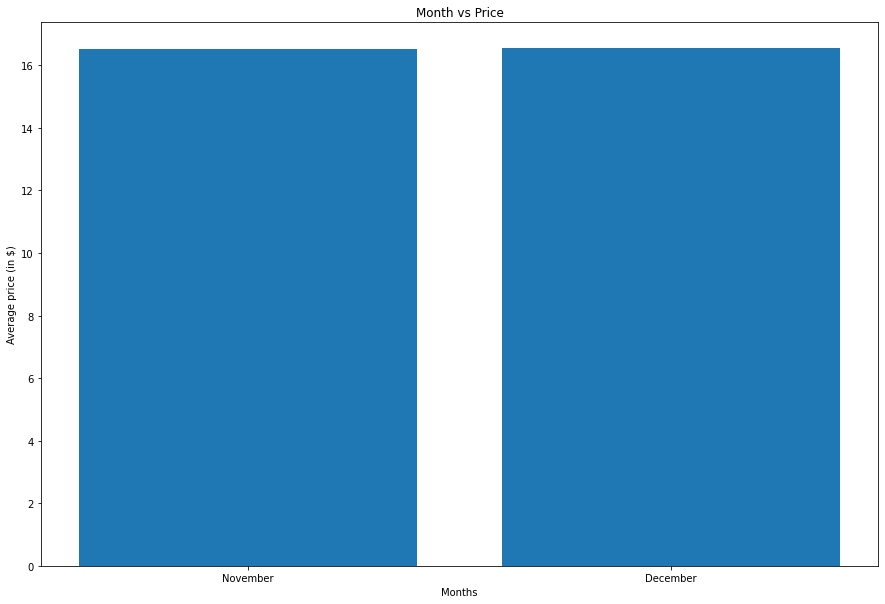

In [17]:
## Month vs price
month_vs_price = plt.figure(figsize=(15, 10))
lst = []
for i in range(11,13) :
    price = df.loc[df.month==i]['price'].mean()
    lst += [price]
plt.bar(['November','December'],lst)
plt.title("Month vs Price")
plt.xlabel("Months")
plt.ylabel("Average price (in $)")

Text(0, 0.5, 'Average Price(in $)')

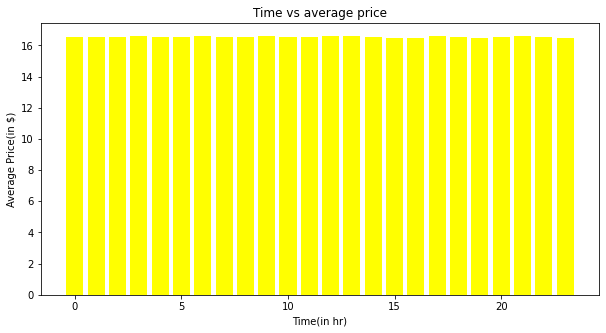

In [18]:
## time vs average price
time_price = plt.figure(figsize=(10, 5))
lst = df['hour'].unique()
num = [0]*len(lst)
for data in lst :
    num[data] = df[df.hour==data]['price'].mean()
plt.bar(lst,num,color = "yellow")
plt.title("Time vs average price")
plt.xlabel("Time(in hr)")
plt.ylabel("Average Price(in $)")


Text(0, 0.5, 'Number of cabs')

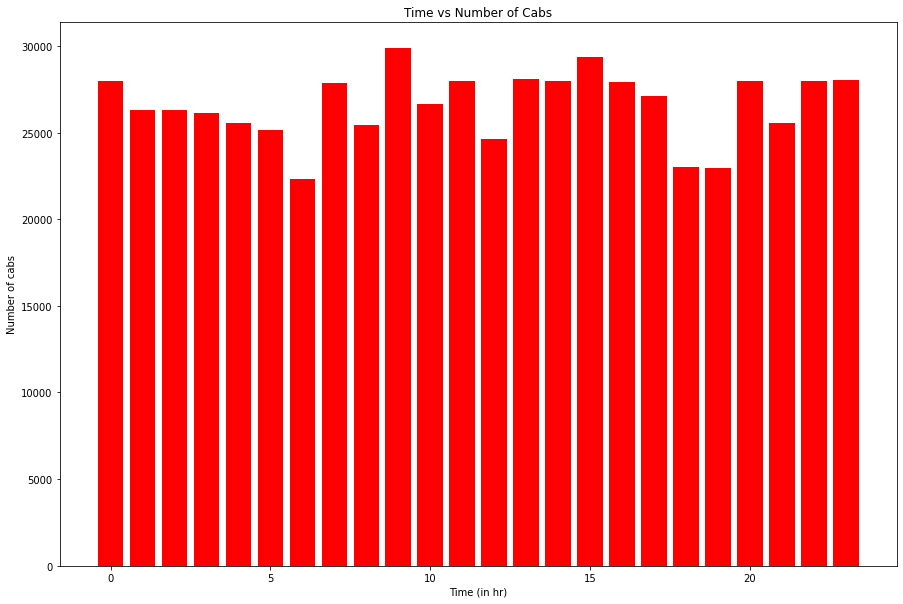

In [19]:
## time vs number of cabs
time_vs_cabs = plt.figure(figsize=(15, 10))
lst = df['hour'].unique()
num = [0]*24
for data in lst :
    num[data] = len(df[df.hour==data])


plt.bar(lst,num,color = "red")
plt.title("Time vs Number of Cabs")
plt.xlabel("Time (in hr)")
plt.ylabel("Number of cabs")

Text(0, 0.5, 'Price')

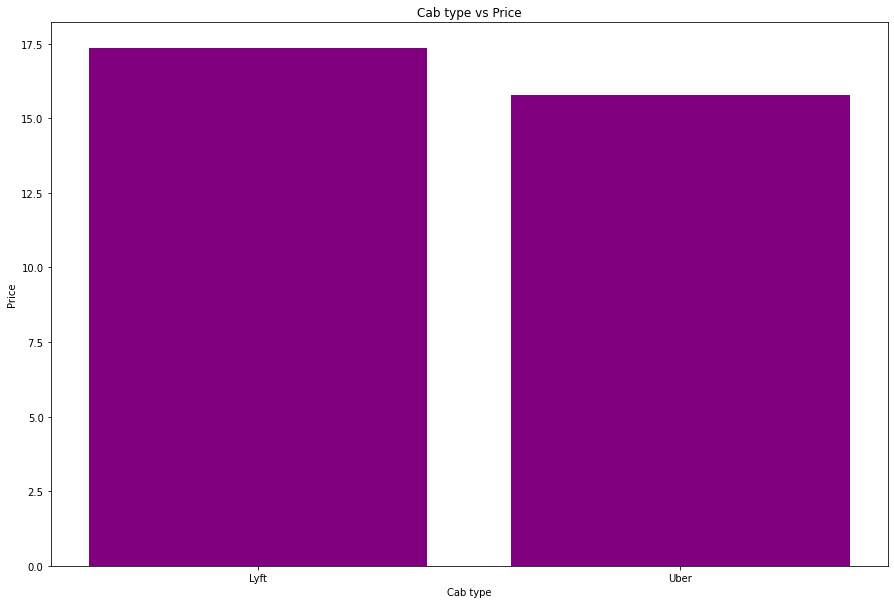

In [20]:
## cab type vs price
cab_vs_price = plt.figure(figsize=(15, 10))
lst = df['cab_type'].unique()
avg_price = []
for data in lst :
    new_df = df[df.cab_type == data]
    avg_price += [new_df['price'].mean()]
plt.bar(lst,avg_price,color = "purple")
plt.title("Cab type vs Price")
plt.xlabel("Cab type")
plt.ylabel("Price")

Text(0.5, 0, 'Price')

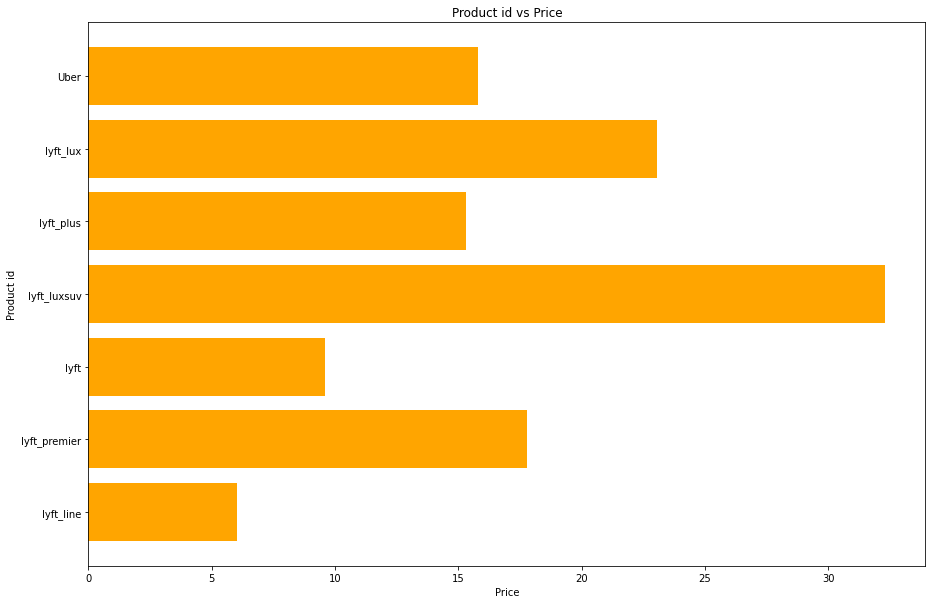

In [21]:
## product id vs price
prod_vs_price = plt.figure(figsize=(15, 10))
lst = df['product_id'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.product_id == data]['price'].mean()]
plt.barh(lst,avg_price,color = "orange")
plt.title("Product id vs Price")
plt.ylabel("Product id")
plt.xlabel("Price")

Text(0, 0.5, 'Climate conditions')

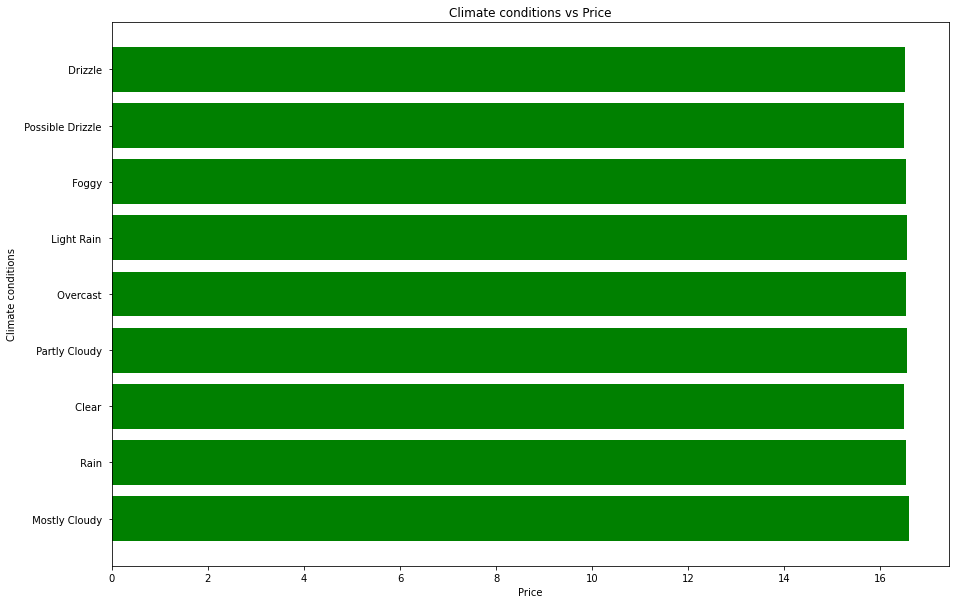

In [22]:
## climate conditions vs price
climate_vs_price = plt.figure(figsize=(15, 10))
lst = df['short_summary'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.short_summary==data]['price'].mean()]
plt.barh(lst,avg_price,color = "green")
plt.title("Climate conditions vs Price")
plt.xlabel("Price")
plt.ylabel("Climate conditions")

Text(0, 0.5, 'Source')

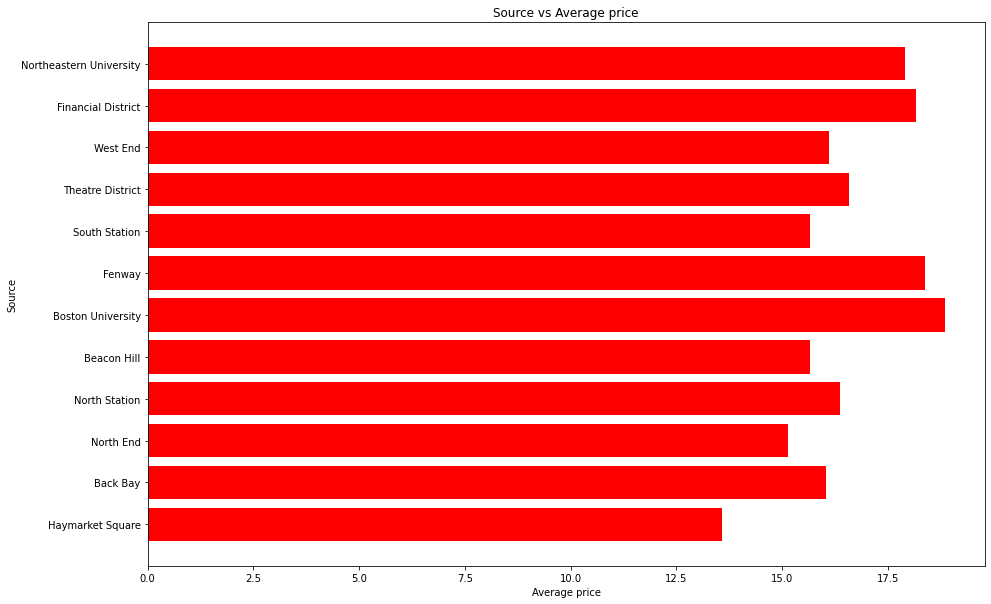

In [23]:
## source vs avg price
source_vs_price = plt.figure(figsize=(15, 10))
lst = df['source'].unique()
Dist = {}
for data in lst :
    Dist[data] = df[df.source == data]['price'].mean()
plt.barh(list(Dist.keys()),Dist.values(),color = "red")
plt.title("Source vs Average price")
plt.xlabel("Average price")
plt.ylabel("Source")

Text(0, 0.5, 'Destination')

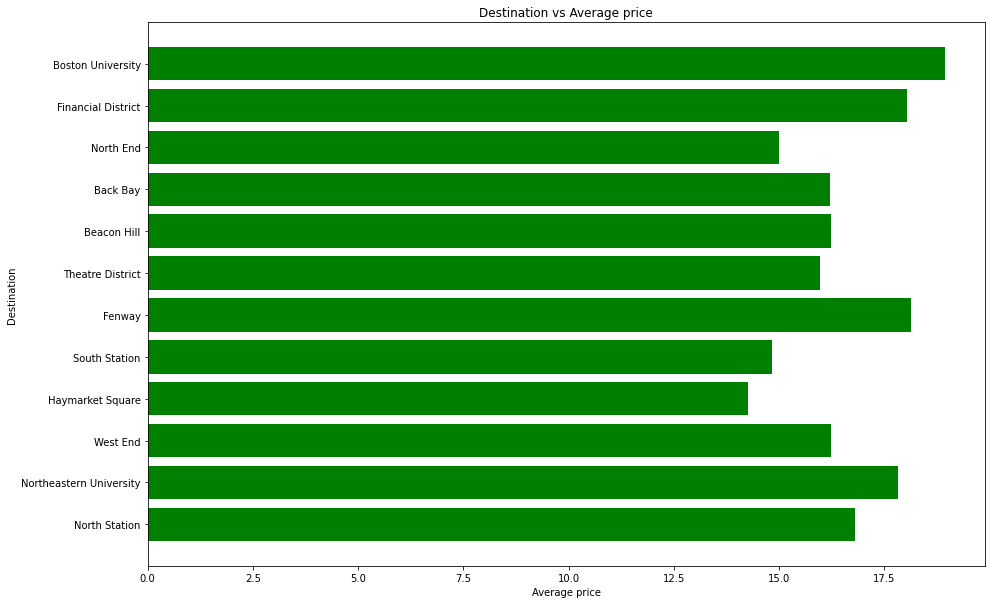

In [24]:
## destinations vs avg price
dest_vs_price = plt.figure(figsize=(15, 10))
lst = df['destination'].unique()
Dist = {}
for data in lst :
    Dist[data] = df[df.destination == data]['price'].mean()
plt.barh(list(Dist.keys()),Dist.values(),color = "green")
plt.title("Destination vs Average price")
plt.xlabel("Average price")
plt.ylabel("Destination")

{'Haymarket Square': 3147, 'Back Bay': 3201, 'North End': 3171, 'North Station': 2576, 'Beacon Hill': 2841, 'Boston University': 3172, 'Fenway': 3166, 'South Station': 3160, 'Theatre District': 3201, 'West End': 2980, 'Financial District': 4197, 'Northeastern University': 3164}


Text(0, 0.5, 'Source')

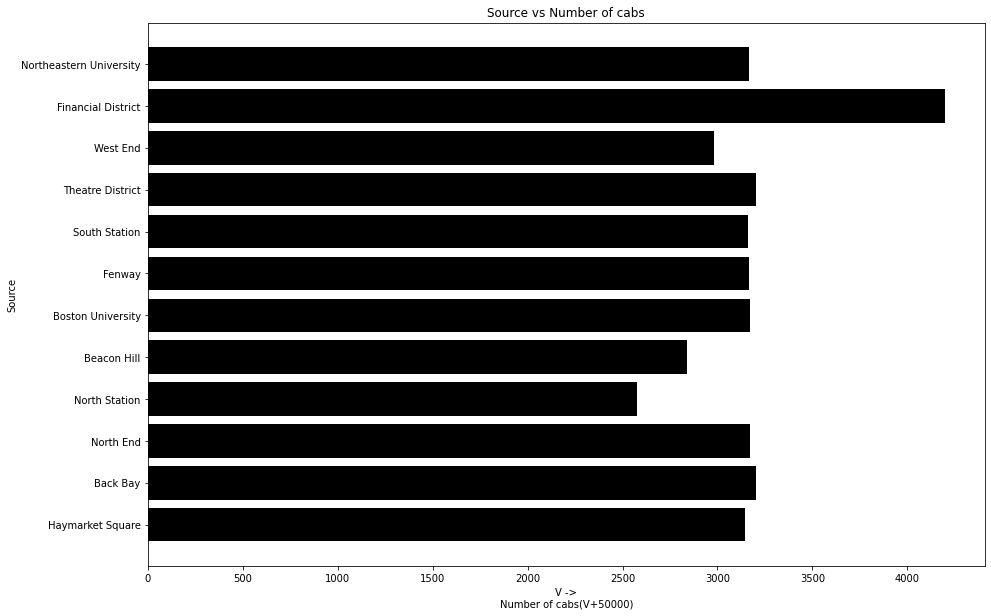

In [25]:
## source vs number of cabs
source_vs_cabs = plt.figure(figsize=(15, 10))
lst = df['source'].unique()
Dist = {}
for data in lst :
    Dist[data] = len(df[df.source == data])-50000
print(Dist)
plt.barh(list(Dist.keys()),list(Dist.values()),color = "black")
plt.title("Source vs Number of cabs")
plt.xlabel("V ->\nNumber of cabs(V+50000)")
plt.ylabel("Source")

Text(0, 0.5, 'Destinations')

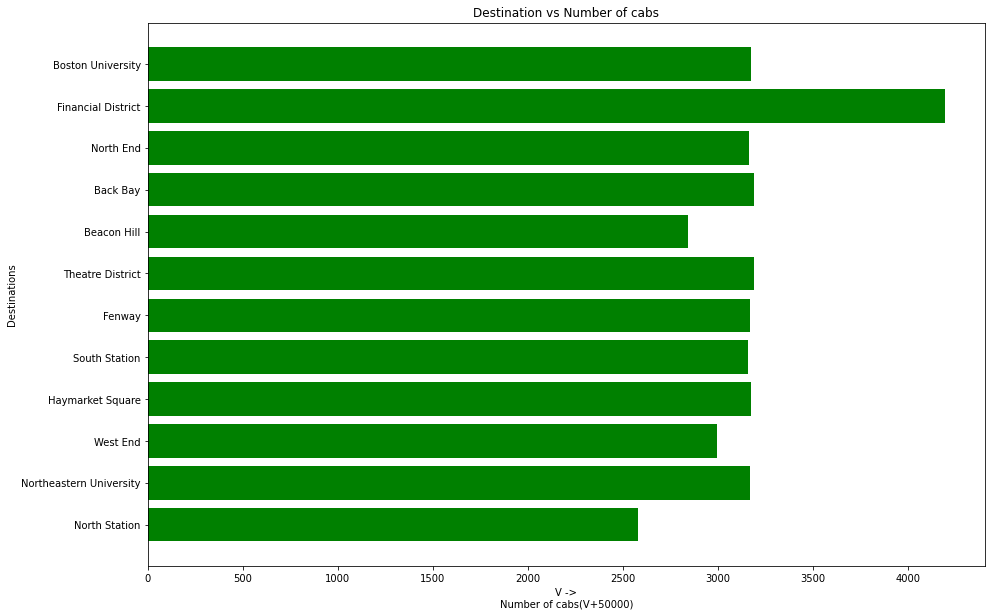

In [26]:
## destinations vs number of cabs
# figure.tight_layout(pad = 5)
dest_vs_cabs = plt.figure(figsize=(15, 10))
# figure.tight_layout(pad=5)
# figure.set_figwidth(15)
# figure.set_figheight(10)
lst = df['destination'].unique()
Dist = {}
for data in lst :
    Dist[data] = len(df[df.destination == data])-50000
plt.barh(list(Dist.keys()),Dist.values(),color = "green")
plt.title("Destination vs Number of cabs")
plt.xlabel("V ->\nNumber of cabs(V+50000)")
plt.ylabel("Destinations")


#### Data encoding

In [27]:
New_df = pd.get_dummies(df,columns=['source','destination','cab_type','product_id','name','short_summary','long_summary','icon'],drop_first=True)

#### Predicting Price

In [28]:
x = New_df.drop(['price','datetime'],axis='columns')
y = New_df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=69);

model = linear_model.LinearRegression()
model.fit(x_train,y_train)
pred_val = model.predict(x_test)
print(r2_score(y_test,pred_val))

0.9280998663296596


In [29]:
df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparent

<BarContainer object of 6 artists>

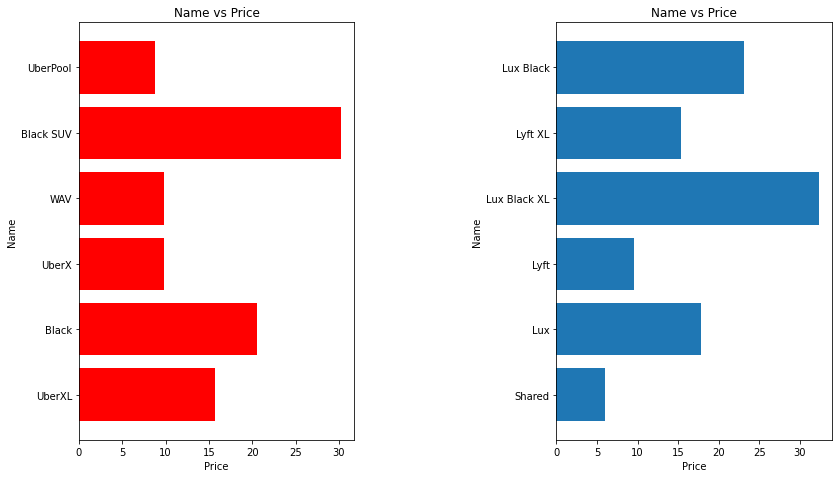

In [30]:
figure,axis = plt.subplots(1,2)
figure.tight_layout(pad = 5)
figure.set_figwidth(15)
figure.set_figheight(10)

lst = df[df.cab_type == 'Uber']['name'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.name == data]['price'].mean()]
axis[0].title.set_text('Name vs Price')
axis[1].title.set_text('Name vs Price')
axis[0].set_xlabel('Price')
axis[1].set_xlabel('Price')
axis[1].set_ylabel('Name')
axis[0].set_ylabel('Name')
# plt.title("Name vs Price")
# plt.xlabel("Price")
# plt.ylabel("Name")
axis[0].barh(lst,avg_price,color = "red")

lst = df[df.cab_type == 'Lyft']['name'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.name == data]['price'].mean()]
# plt.title("Name vs Price")
# plt.xlabel("Price")
# plt.ylabel("Name")
axis[1].barh(lst,avg_price)



In [31]:
## removing the unwanted features 
New_df = df[['hour','day','month','source','destination','cab_type','product_id','name','price','distance','surge_multiplier','short_summary']]
New_df['hour'] = New_df['hour'].astype(str)
New_df = pd.get_dummies(New_df,columns = ['source','destination','cab_type','product_id','short_summary'],drop_first = True)
New_df = pd.get_dummies(New_df,columns = ['hour','name'],drop_first = False)
x = New_df.drop(['price'],axis = "columns")
y = New_df['price']

c:\Users\Priyanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state=69)
model = linear_model.LinearRegression()

model.fit(x_train,y_train)
pred_val = model.predict(x_test)
print(r2_score(y_test,pred_val))

0.9281028929415365


#### Predicting what is minimum price for a particular day

In [33]:
## creating sample x and y
sample = New_df.sample()
sample_x = sample.drop(['price'],axis = 'columns')
sample_y = sample['price']
string = 'hour_'
actual_hr = -1
for i in range(24) :
    if 1 in sample_x[string + str(i)].unique() :
        actual_hr = i
        sample_x[string+str(i)] = 0
min_price = 1000
ans = 0
for i in range(24) :
    sample_x['hour_'+str(i)] = 1
    price = model.predict(sample_x)
    sample_x['hour_'+str(i)] = 0
    if price < min_price :
        min_price = price
        ans = i
print("Predicted Minimum price and hour")
print(min_price,ans)
print("************")
print("Actual price")
print(sample_y)
print("Actual hour")
print(actual_hr)

Predicted Minimum price and hour
[21.31085205] 18
************
Actual price
62335    21.0
Name: price, dtype: float64
Actual hour
14


#### Predicting what cab should someone get at a particular a price

In [42]:
print(New_df.columns)

Index(['day', 'month', 'price', 'distance', 'surge_multiplier',
       'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End', 'cab_type_Uber',
       'product_id_lyft', 'product_id_lyft_line', 'product_id_lyft_lux',
       'product_id_lyft_luxsuv', 'product_id_lyft_plus',
       'product_id_lyft_premier', 'short_summary_ Drizzle ',
       'short_summary_ Foggy ', 'short_summary_ Light Rain ',

In [54]:
## first need to implement decision tree model to predict the name of cab
## Then use the same technique to find cab of that particular range

from sklearn.tree import DecisionTreeClassifier

df_cab=df[['day','month','hour','source','destination','price','distance','name']]
df_cab = pd.get_dummies(df_cab,columns = ['source','destination'],drop_first = True)
# x_cabPred=df.drop(['name'],axis='columns')

x_cabPred=df_cab.drop(['name'],axis='columns')
y_cabPred=df['name']

# print(x_cabPred.head())
# print(y_cabPred.head())

# df.head(
X_train, X_test, y_train, y_test = train_test_split(x_cabPred, y_cabPred, test_size = 0.3, random_state = 100)
modelTree=DecisionTreeClassifier(max_depth=100,random_state=100)
modelTree.fit(X_train,y_train)

sampleIn=df_cab.sample()
sampleInput=sampleIn.drop(['name'],axis='columns')
# sampleIndex=x_cabPred.iloc(sampleInput)
predValue=modelTree.predict(sampleInput)

print('The predicted values is ')
print(predValue)
print('The actual values is ')
print(sampleIn['name'])

The predicted values is 
['Black']
The actual values is 
4177    Black
Name: name, dtype: object
